# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [92]:
import pandas
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import numpy as np
from bs4 import BeautifulSoup

In [24]:
url = "https://books.toscrape.com/"

In [25]:
response = requests.get(url)

In [26]:
page_element = BeautifulSoup(response.text, "html.parser")

In [31]:
product_elements = page_element.select("article.product_pod")
product_elements

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [29]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."
    image_tag = product_element.find("a").find("img")
    return image_tag.get("src")
    raise NotImplementedError()

Test your implementation by running the following cell.

In [60]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

**(0.2 points)** Implement the `get_rating` function to return the product’s rating as an integer between 1 and 5. For example, the first product on the page has a rating of `3`.

In [64]:
### AUTOMATICALLY GRADED TASK
def get_rating(product_element):
    "Get the rating (1-5) of the given product element."
    paragraph = product_element.select("p")[0]
    paragraphClass = paragraph.get("class")
    rating_map = {
        "One": 1,
        "Two": 2,
        "Three": 3,
        "Four": 4,
        "Five": 5,
    }
    return rating_map.get(paragraphClass[1],0)
    raise NotImplementedError()

Test your implementation by running the following cell.

In [65]:
### TEST
assert get_rating(product_elements[0]) == 3

**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [72]:
### AUTOMATICALLY GRADED TASK
def get_title(product_element):
    "Get the full-length title of the given product element."
    return product_element.select_one("h3").select_one("a").get("title")
    # YOUR CODE HERE
    raise NotImplementedError()

Test your implementation by running the following cell.

In [73]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"

**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [85]:
def get_price(product_element):
    price = product_element.select_one(".price_color").text
    price = float(price.replace('Â', '').replace('£', ''))
    return price
    # YOUR CODE HERE
    raise NotImplementedError()

Test your implementation by running the following cell.

In [86]:
### TEST
assert get_price(product_elements[0]) == 51.77

In [87]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [88]:
get_attributes(product_elements[0])

{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [89]:
product_data = [get_attributes(product_element) for product_element in product_elements]

In [90]:
df = pd.DataFrame(product_data)

In [97]:
df

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23
5,media/cache/68/33/68339b4c9bc034267e1da611ab3b...,1,The Requiem Red,22.65
6,media/cache/92/27/92274a95b7c251fea59a2b8a7827...,4,The Dirty Little Secrets of Getting Your Dream...,33.34
7,media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78...,3,The Coming Woman: A Novel Based on the Life of...,17.93
8,media/cache/66/88/66883b91f6804b2323c8369331cb...,4,The Boys in the Boat: Nine Americans and Their...,22.60
9,media/cache/58/46/5846057e28022268153beff6d352...,1,The Black Maria,52.15


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [ ]:
# df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

In [106]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""
    rating_counts = df['rating'].value_counts()
    plt.title('Number of Products by Rating')
    plt.xlabel('Rating (1–5)')
    plt.ylabel('Number of Products')
    return plt.bar(rating_counts.index, rating_counts.values)

    # YOUR CODE HERE
    raise NotImplementedError()

<BarContainer object of 5 artists>

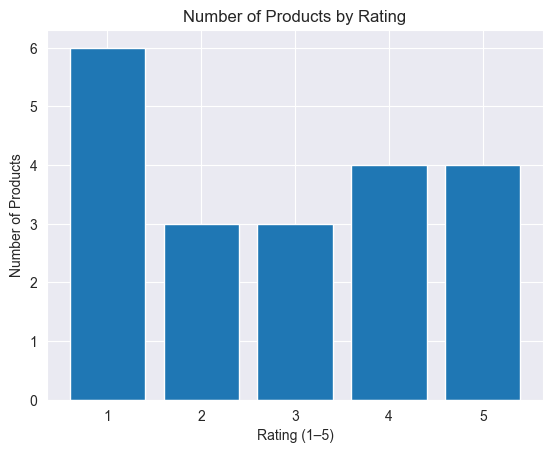

In [107]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

In [123]:
### MANUALLY GRADED TASK
def plot_price_distribution(df):
    """Plot the price distribution of the products."""
    plt.figure(figsize=(8, 5))
    plt.title('Distribution of Product Prices')
    plt.xlabel('Price')
    plt.ylabel('Number of Products')

    return sns.histplot(df['price'],bins=10)

    # YOUR CODE HERE
    raise NotImplementedError()

<Axes: title={'center': 'Distribution of Product Prices'}, xlabel='Price', ylabel='Number of Products'>

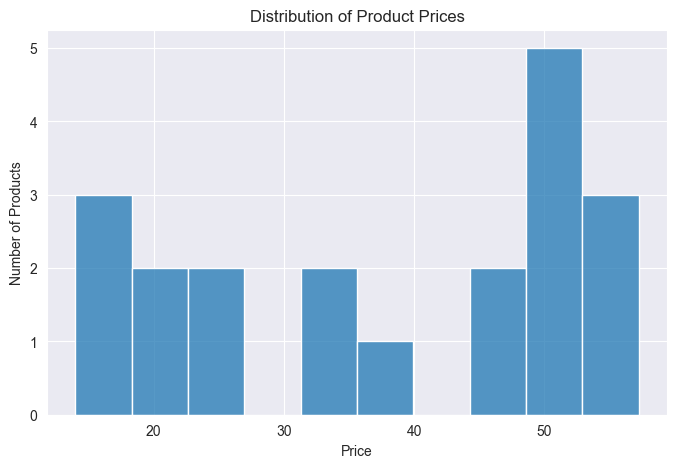

In [124]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

In [125]:
    ### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""
    df['title_length'] = df['title'].apply(len)

    plt.figure(figsize=(8, 5))
    plt.title('Distribution of Product Title Lengths')
    plt.xlabel('title_length')
    plt.ylabel('Number of Products')

    return sns.histplot(df['title_length'],bins=10)
    # YOUR CODE HERE
    raise NotImplementedError()

<Axes: title={'center': 'Distribution of Product Title Lengths'}, xlabel='title_length', ylabel='Number of Products'>

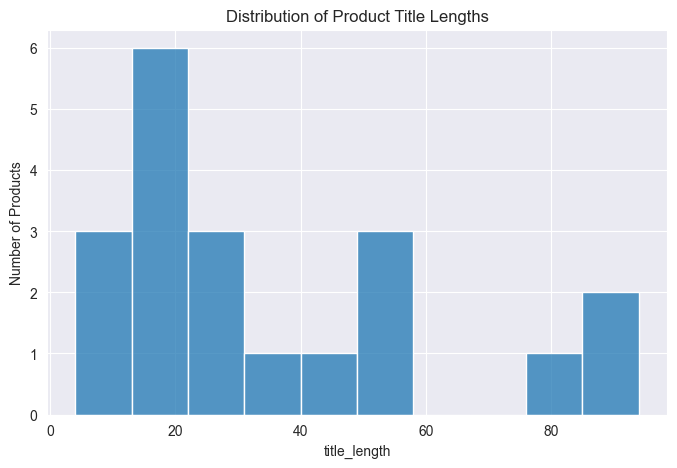

In [126]:
plot_title_length_distribution(df)

**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

In [127]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""
    return sns.boxplot(x='rating', y='price',data=df)
    # YOUR CODE HERE
    raise NotImplementedError()

<Axes: xlabel='rating', ylabel='price'>

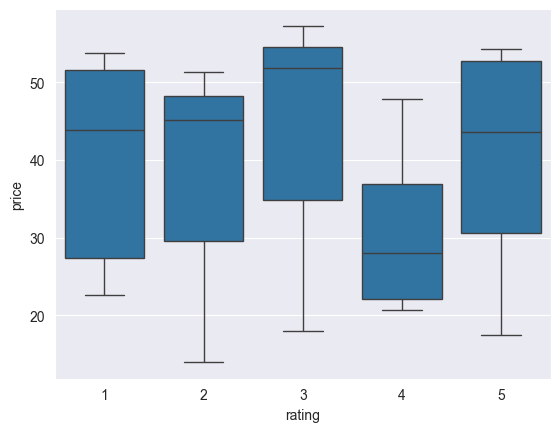

In [128]:
plot_price_distribution_per_rating(df)

**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

In [129]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""
    return sns.heatmap(df.corr(numeric_only=True), annot=True)
    # YOUR CODE HERE
    raise NotImplementedError()

<Axes: >

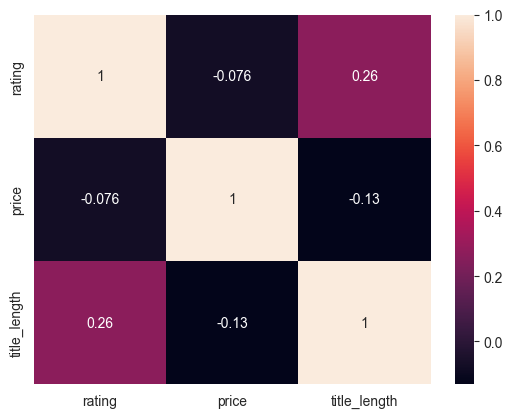

In [130]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [141]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """
    stats_per_rating = df.groupby('rating')['price'].describe()
    stats_per_rating = stats_per_rating[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    stats_per_rating.rename(columns={'50%': 'median'}, inplace=True)
    stats_per_rating = pd.DataFrame(stats_per_rating)
    return stats_per_rating

    # YOUR CODE HERE
    raise NotImplementedError()

In [142]:
compute_descriptive_stats_for_price_per_rating(df)

,count,mean,std,min,25%,median,75%,max
rating,,,,,,,,
1,6.0,40.018333,14.178174,22.65,27.3075,43.845,51.6375,53.74
2,3.0,36.830000,20.018382,13.99,29.5800,45.170,48.2500,51.33
3,3.0,42.316667,21.296472,17.93,34.8500,51.770,54.5100,57.25
4,4.0,31.105000,12.460865,20.66,22.1150,27.970,36.9600,47.82
5,4.0,39.750000,17.186613,17.46,30.6300,43.655,52.7750,54.23
